# US vs UK - Interest Rate | Inflation Rate

In [1]:
import tradingeconomics as te
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
# import mplfinance as mpf
import matplotlib.dates as mpl_dates
from datetime import datetime
# import json
# import urllib
# import sys
from datetime import *
from tradingeconomics import glob
import ssl
# from urllib.request import urlopen
import plotly.graph_objs as pgo

In [2]:
te.login('jupyter:jupyter')

'You are logged in as a jupyter:jupyter'

In [3]:
def get_indicator_historical_country(countries_list,indicator, initDate, endDate, plot_type):

    def getHistoricalData(country_list,indicator, initDate, endDate):
        dataframe_list = []
        for country in country_list:
            df_country = te.getHistoricalData(country = country, indicator = indicator, initDate = initDate, endDate = endDate, output_type='df')
            df_country['DateTime'] = pd.to_datetime(df_country["DateTime"])
            df_country = df_country.set_index('DateTime')
            df_country = df_country.drop(['Category','Frequency','HistoricalDataSymbol','LastUpdate'],axis=1)
            dataframe_list.append(df_country)
        return dataframe_list
    def get_static_plot(stock_df, indicator):
        plt.style.use('bmh')
    #     plt.rcParams.update({'figure.autolayout': True})
        fig, ax = plt.subplots(figsize=(20,5))  # Create a figure and an axes.
        i = 0
        for df in stock_df:
    #         ax.plot(df['Value'], label=dict_map['name_list'][0][i])  # Plot some data on the axes.
            ax.plot(df['Value'], label= df['Country'][0:1][0])  # Plot some data on the axes.
            i += 1


        ax.set_xlabel('Date')  # Add an x-label to the axes.
    #     ax.set_ylabel(dict_map['unit_list'][0][0])  # Add a y-label to the axes.
        ax.set_ylabel('%')  # Add a y-label to the axes.
        ax.set_title(f"Performance for {indicator.upper()} ")  # Add a title to the axes.
        ax.legend(fontsize='x-large')  # Add a legend.
    def get_dynamic_plot(stock_df,indicator):
             #Dynamic Plot

            fig = pgo.Figure()

            for df in stock_df:
                fig.add_trace(pgo.Scatter(x=df.index, y= df['Value'], name =df['Country'][0:1][0]))
            fig.update_layout(title=f"Performance for {indicator.upper()} ", yaxis_title='%')
            fig.update_xaxes(rangeslider_visible = True,
                            rangeselector = dict(
                            buttons=list([           
                                dict(count=1, label='1 Month', step='month', stepmode='todate'),
                                dict(count=3, label='3 Month', step='month', stepmode='todate'),
                                dict(count=5, label='5 Month', step='month', stepmode='todate'),
                                dict(count=7, label='7 Month', step='month', stepmode='todate'),
                                dict(label='1 Year', step='all')
                            ])))
            fig.update_layout(
                autosize=True,
                height=700,
                margin=dict(
                    l=50,
                    r=50,
                    b=100,
                    t=100
                )
            )

            fig.show(renderer='plotly_mimetype')
            
    dataframe_list = getHistoricalData(countries_list, indicator, initDate, endDate)
    if plot_type == 'static':
        get_static_plot(dataframe_list, indicator)
    elif plot_type == 'dynamic':
        get_dynamic_plot(dataframe_list, indicator)
        
def get_indicators_historical_country(country,indicator_list, initDate, endDate, plot_type):
    
    def getHistoricalData(country,indicator_list, initDate, endDate):
        dataframe_list = []
        for indicator in indicator_list:
            df_country = te.getHistoricalData(country = country, indicator = indicator, initDate = initDate, endDate = endDate, output_type='df')
            df_country['DateTime'] = pd.to_datetime(df_country["DateTime"])
            df_country = df_country.set_index('DateTime')
            df_country = df_country.drop(['Frequency','HistoricalDataSymbol','LastUpdate'],axis=1)
            dataframe_list.append(df_country)
        return dataframe_list
    
        
    def get_static_plot(stock_df, country):
        plt.style.use('bmh')
    #     plt.rcParams.update({'figure.autolayout': True})
        fig, ax = plt.subplots(figsize=(20,5))  # Create a figure and an axes.
        i = 0
        for df in stock_df:
    #         ax.plot(df['Value'], label=dict_map['name_list'][0][i])  # Plot some data on the axes.
            ax.plot(df['Value'],label= df['Category'][0:1][0])  # Plot some data on the axes.
            i += 1

    #     label= stock_df['Category'][0:1][0]

        ax.set_xlabel('Date')  # Add an x-label to the axes.
    #     ax.set_ylabel(dict_map['unit_list'][0][0])  # Add a y-label to the axes.
        ax.set_ylabel('%')  # Add a y-label to the axes.
        ax.set_title(f"Performance for {country.upper()} ")  # Add a title to the axes.
        ax.legend(fontsize='x-large')  # Add a legend.

    def get_dynamic_plot(stock_df,country):
        #Dynamic Plot

        fig = pgo.Figure()

        for df in stock_df:
            fig.add_trace(pgo.Scatter(x=df.index, y= df['Value'], name =df['Category'][0:1][0]))
        fig.update_layout(title=f"Performance for {country.upper()} ", yaxis_title='%')
        fig.update_xaxes(rangeslider_visible = True,
                        rangeselector = dict(
                        buttons=list([           
                            dict(count=1, label='1 Month', step='month', stepmode='todate'),
                            dict(count=3, label='3 Month', step='month', stepmode='todate'),
                            dict(count=5, label='5 Month', step='month', stepmode='todate'),
                            dict(count=7, label='7 Month', step='month', stepmode='todate'),
                            dict(label='1 Year', step='all')
                        ])))
        fig.update_layout(
            autosize=True,
            height=700,
            margin=dict(
                l=50,
                r=50,
                b=100,
                t=100
            )
        )

        fig.show()
    
    
    
    dataframe_list = getHistoricalData(country= country, indicator_list=indicator_list, initDate=initDate,endDate=endDate)
    if plot_type == 'static':
        get_static_plot(dataframe_list, country)
    elif plot_type == 'dynamic':
        get_dynamic_plot(dataframe_list, country)


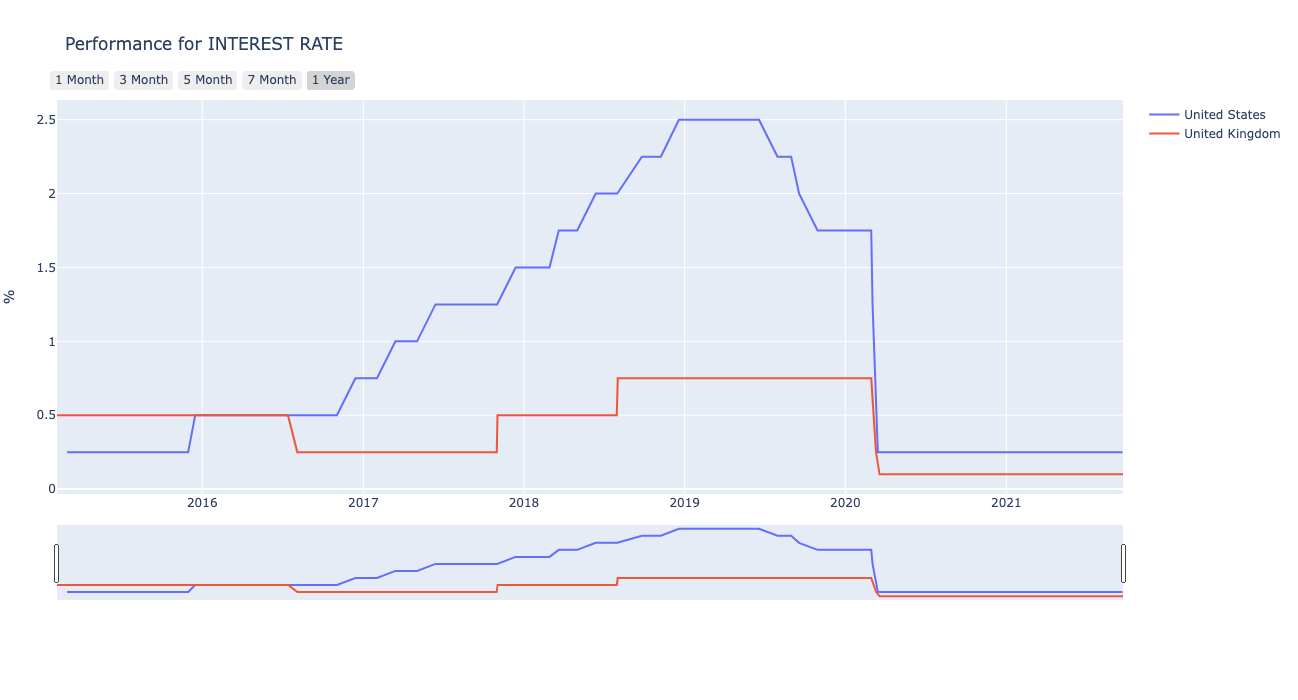

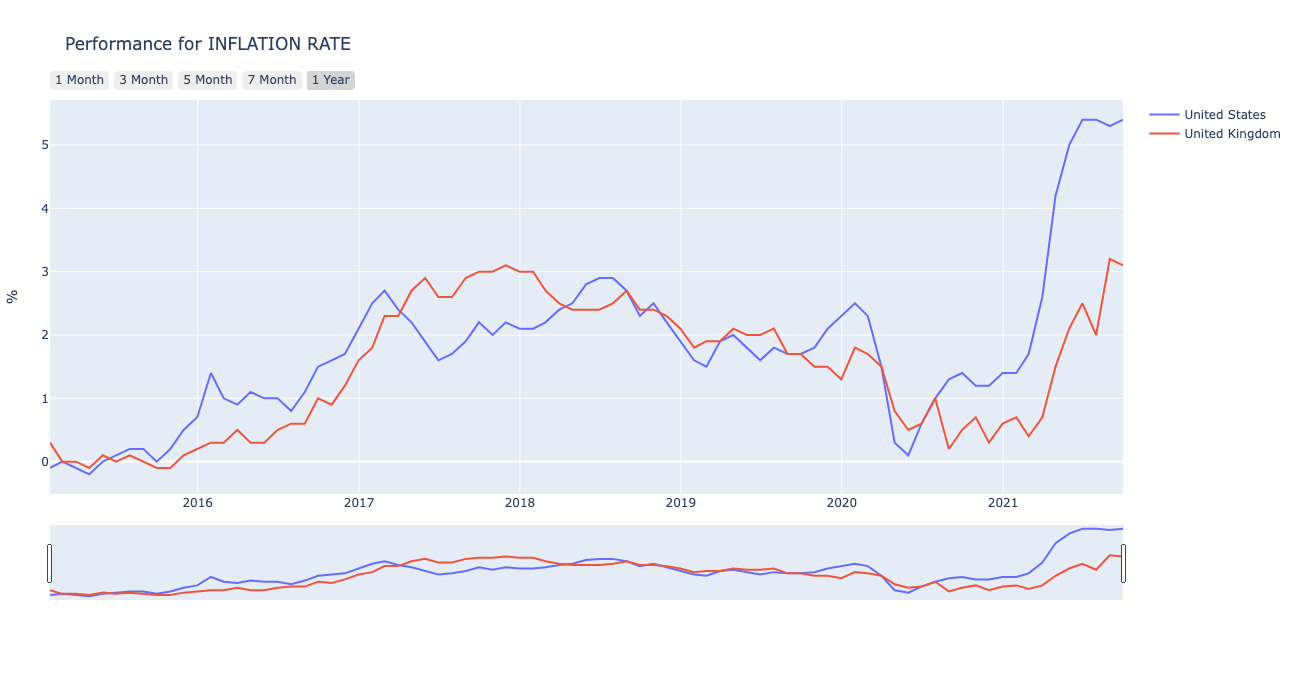

In [4]:
countries_list = ['united states','united kingdom']
indicator = 'interest rate'
initDate = '2015-01-30'
endDate = '2021-09-30'

get_indicator_historical_country(countries_list=countries_list,indicator=indicator,initDate=initDate,endDate=endDate, plot_type='dynamic' )

countries_list = ['united states','united kingdom']
indicator = 'inflation rate'
initDate = '2015-01-30'
endDate = '2021-09-30'

get_indicator_historical_country(countries_list=countries_list,indicator=indicator,initDate=initDate,endDate=endDate, plot_type='dynamic' )



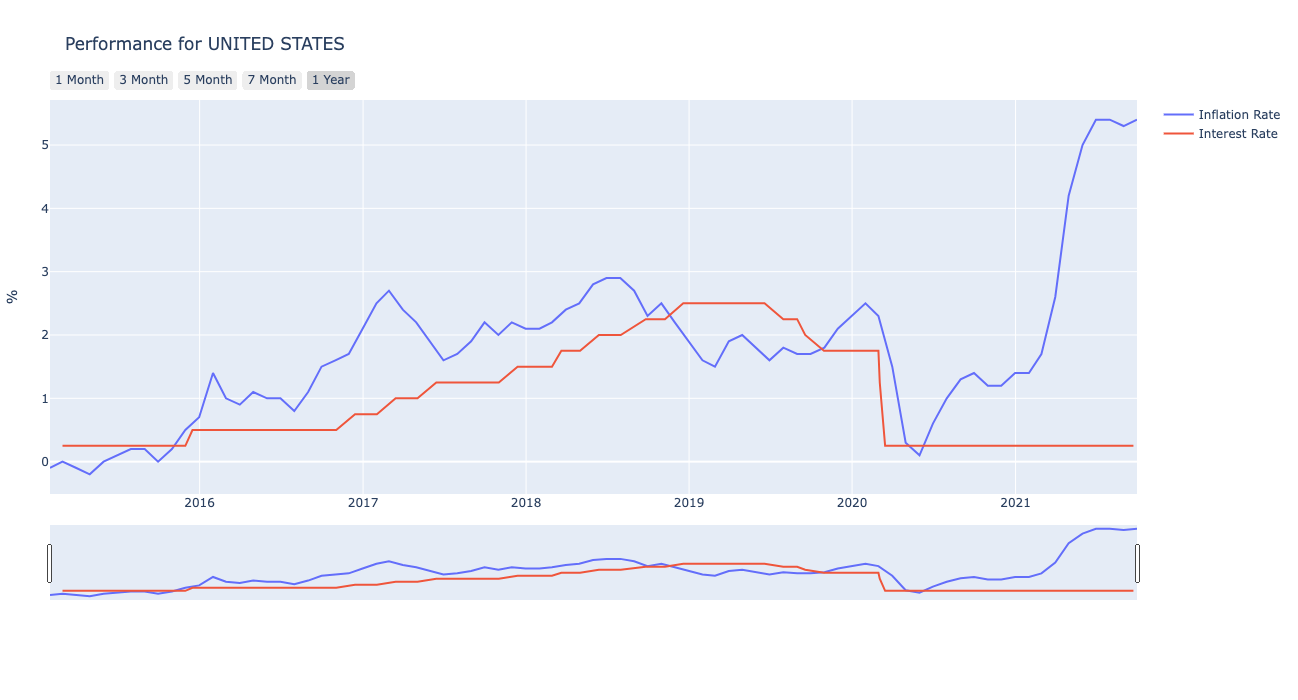

In [7]:
country = 'united states'
indicator = ['inflation rate','interest rate']
initDate = '2015-01-30'
endDate = '2021-09-30'
plot_type='dynamic'
get_indicators_historical_country(country,indicator, initDate, endDate, plot_type)

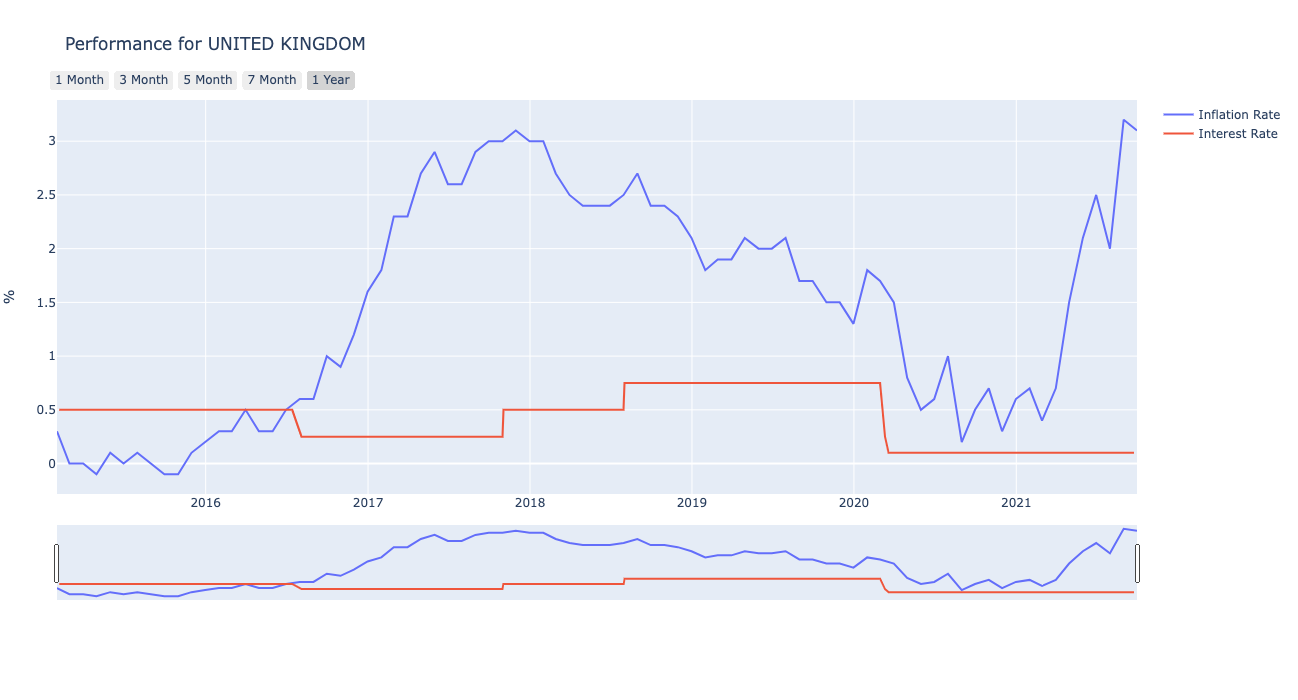

In [8]:
country = 'united kingdom'
indicator = ['inflation rate','interest rate']
initDate = '2015-01-30'
endDate = '2021-09-30'
plot_type='dynamic'
get_indicators_historical_country(country,indicator, initDate, endDate, plot_type)

In [9]:
# tennessee.matos@tradingeconomics.com 